In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
# K-Means Classification

def classification(rawimage, clusters, outputimage):
    original_image = cv2.imread(rawimage)
    img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    vectorized = img.reshape((-1, 3))
    vectorized = np.float32(vectorized)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = clusters
    attempts = 10
    ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape(img.shape)
    figure_size = 15
    cv2.imwrite(outputimage, result_image)
    return result_image 





In [2]:
rimg = classification("DJI_0289.jpg", 5, "5Clusters.jpg")

29
74
113
162
203


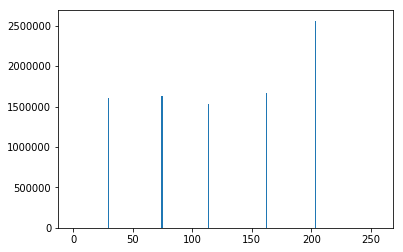

In [3]:
image = []
gray = cv2.cvtColor(rimg, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
colors = np.where(hist>5000)
img_number = 0
for color in colors[0]:
    print(color)
    split_image = rimg.copy()
    split_image[np.where(gray != color)] = 0
    cv2.imwrite(str(img_number)+".jpg",split_image)
    img_number+=1
plt.hist(gray.ravel(),256,[0,256])
plt.savefig('plt')
plt.show()

In [7]:
colours = [x for x in range(4)]
col = ["pixel"] + colours
pixels = pd.DataFrame(columns=col)



Empty DataFrame
Columns: [pixel, 0, 1, 2, 3]
Index: []


Empty DataFrame
Columns: [0, 1, 2, 3]
Index: []


In [8]:
import io
img = Image.open("DJI_0289.jpg")
print(img)

<PIL.MpoImagePlugin.MpoImageFile image mode=RGB size=4000x2250 at 0x20380D42C08>
